# Definición de clases: Agente y Entorno

A continuación se definen las clases y métodos necesarios para su uso posterior en el algoritmo de aprendizaje pro refuerze.
Las clases principales son las de el **Agente**(Agent) y el **Entorno**(Environment).

In [30]:
import numpy as np
import random
import copy

Q = {} #dictionary for the Q function [(state, action), value]

b = 0.95 #bias parameter (particular to the example)

Actions = [0, 1, 2] #list of possible agent's actions (particular to the example)

Q[(0,0)] = 0.0 ### some initializations particular to the example
amax0 = 0 ### some initializations particular to the example 

class Envsim: # the necessary methods and data structures for the simulation of the environment

      def __init__(self, name):
        self.name = name

      def rand0(self, state):
          s = copy.copy(state)
          s = s + 2.0*(random.randint(0, 1) - 0.5)
          #print(s, round(s))
          return round(s)
          
      def rand1(self, state):
          s = copy.copy(state)
          u = random.uniform(0,1)
          #print(s)
          if u < b:
             s = s + 1
          else:
             s = s - 1
          #print(u,s)
          return s
          
      def rand2(self, state):
          s = copy.copy(state)
          u = random.uniform(0,1)
          #print(s)
          if u < b:
             s = s - 1
          else:
             s = s + 1
          #print(u,s)
          return s   

      def Enviro(self, state, action): # Given a (state_t, action_t) pair, it generates (s_t+1, r_t+1)
          a = copy.copy(action)
          s = copy.copy(state)
          z = Envsim(self)
          r = 0.0
          ra = -1.0
          rb = 1.0
          rc = 0.0
          if a==0:
             s = z.rand0(state)
          if a==1:
             s = z.rand1(state)
          if a==2:
             s = z.rand2(state)
          else:
             s = s
             
          if -10 < s < 0:
             r = ra
          if 0 < s < 10:
             r = rb    
          if s == 0:
             r = rc  
          
          return s, r
                    
class Policy: #class for action selection and value updates according to the Q-Learning rule

      def __init__(self, name):
          self.name = name

      def maxq(self, state, Actions):
          s = copy.copy(state)
          max = -10e10
          amax = None
          for a in Actions:
              u = Q.get(tuple([s,a])) #value associated to the key list [s,a]
              if u is None:
                 u = -20e10
              if u > max:
                 amax = copy.copy(a)
                 max = copy.copy(u)
          #print(s, amax)
          return amax
          
      def epsilon_greedy(self, state, Actions): #epsilon-greedy decisions for systems 
          #in which is possible to select any action at random given state s
          epsilon = 0.1
          z = Policy(self)
          comple = np.random.rand()
          if epsilon > comple:
             #chooses and action at random
             a = random.randint(0, (len(Actions)-1))
             #print(a)
             return a
          else:
              #Returns the action with the maximum Q-value
              a = z.maxq(state, Actions)
              #print(a)
              return a
          
      def updateq(self, s0,a0,r1,s1,a1):
          alpha = 0.2 #learning rate
          gamma = 1.0 #discount factor
          q0 = Q.get((s0,a0))
          if q0 is None:
                 q0 = 0.0
          q1 = Q.get((s1,a1))
          if q1 is None:
                 q1 = 0.0
          u = q0 + alpha*(r1 + gamma*q1 - q0)         
          Q[(s0,a0)] = u
          return 

### These are the generic fundamental classes for Q-learning ###################
class Agent:

    def __init__(self, name):
        self.name = name
        
    def action_reset(self):
        action = 0
        return action
          
    def act(self, state):
        z = Policy(self)
        s = copy.copy(state)
        #a = z.maxq(s, Actions)
        a = z.epsilon_greedy(s, Actions)
        #print(a)
        return a
    
    def update(self, state0, action0, reward, state, action):
        s0 = copy.copy(state0)
        a0 = copy.copy(action0)
        r1 = copy.copy(reward)
        s1 = copy.copy(state)
        a1 = copy.copy(action)
        z = Policy(self)
        z.updateq(s0,a0,r1,s1,a1)
        return

class Environment:

    def __init__(self, name):
        self.name = name
        
    def reset(self):
          state = 0
          return state
          
    def step(self, state, action):
        s = copy.copy(state)
        a = copy.copy(action)
        z = Envsim(self)
        s, r = z.Enviro(s,a)
        return s, r
    
    def done(self, state):
        if state == -10 or state == 10:
           vdone = True
        else:
            vdone = False
        return vdone

# 1) Explicar cómo se relacionan las funciones de ambos y cómo se logra en sí la implementación de las funciones en pseudo-código del Algoritmo 1.1 en el programa ql2.py

El algoritmo principal de aprendizaje por refuerzo se explica en el pseudocódigo siguiente:

![title](Alg1.1.PNG)

## Explicación del pseudocódigo

A continuación se explica cada una de las lineas del pseudocódigo y como se relacionan con las lineas del programa del archivo ql2.py. A su vez, las lineas de python correspindientes seran ejecutadas para terminar con el algoritmo completo.

1. Es necesario primero definir al agente y al entorno para el algoritmo, se definen el número máximo de episodios, esto se hace en la variable ```MAX_EPISODE```, en primera instancia este se asigna a un valor de 500. Además también se define la variable del número de pasos que el agente puede recorrer cada iteración ```MAX_TIME```, primero se empieza con 3, para posteriormente cambiarlo a 10 y observar la curva de aprendizaje resultante.
Se definen el agente en la variable ```agent``` y el entorno en la vairbale ```env``` con las clases antes definidas. Esto corresponde solo a la línea número uno de el pseudocódigo pues aún no se empieza con los ciclos del entrenamiento.

In [31]:
MAX_EPISODE = 500
# Default 3 steps each episode
# MAX_TIME = 3 

# 2) Permitir al agente explorar 10 pasos cada episodio
# MAX_TIME = 10

# Dejar que el agente explore 50 pasos para observar la convergencia de la curva de aprendizaje
MAX_TIME = 50

agent = Agent("James Bond")
env = Environment("in a dangerous environment")

2. Se empieza el ciclo que lleva a capo el número de episodios definidos, desde 0 hasta el número máximo de episodios definido ```MAX_EPISODE = 500```. Dentro del ciclo de los episodios se realiza le ejecución del método ```env.reset()```. Para reinicializar el entorno para cada iteración y esto corresponde a la línea 3 del pseudocódigo. Despues se hace ejecuta también el método ```agent.action_reset()``` para el agente para cada iteración. Este paso es necesario ya que el agente y el entorno deben ser reinicializados para asegurar el proceso de aprendizaje.

3. Se define tambíen una variable ```l``` que va aguardar los valores de la curva de aprendizaje para ser graficada despues de realizar el algoritmo.
Comienza el segudo ciclo de 0 al número máximo de pasos ```MAX_TIME = 10```. Dentro de este ciclo se ejecuta el método de estado ```copy.copy(state)```, esto corresponde a la línea 6 del pseudocódigo. Inmediatamente despues se realiza la acción para el agente ```copy.copy(action)``` y se asigna la recompensa con estos previamente asignados ```state, reward = env.step(state0, action0)```. Ahora que se tiene los valores para la recompensa, el estado y la acción, se realiza la actualización del agente con el método ```agent.update(state0, action0, reward, state, action)```, y con esto el agente puede actuar ```action = agent.act(state)```, y este ultimo paso corresponde a la línea 9 del pseudocódigo.

In [32]:
l = [None] * MAX_EPISODE #list to draw the learning curve

for episode in range(MAX_EPISODE):
    state = env.reset()
    action = agent.action_reset() #depending on the learning problem
    cur = 0.0 #cumulative reward for visualization purposes
    for t in range(MAX_TIME):
        state0 = copy.copy(state)
        action0 = copy.copy(action)
        state, reward = env.step(state0, action0)                
        agent.update(state0, action0, reward, state, action)
        action = agent.act(state)
        cur = cur + reward
        if env.done(state) == True:
           break
    l[episode] = cur

4. Una vez terminado los ciclos esto indica que el proceso de aprendizaje se ha completado, y con los valores de la curva de aprendizaje guardados en la variable ```l```, podemos graficar como se dió esta curva.

# 2) Permitir al agente explorar durante 10 pasos cada episodio. Explicar la curva de aprendizaje resultante.

Puesto que la curva de aprendizaje para 10 pasos por episodio es en el mejor caso caotica para interpretar. Se decidio poner 50 pasos por episodio par observar mejor el comportamiento de la curva de aprendizaje.

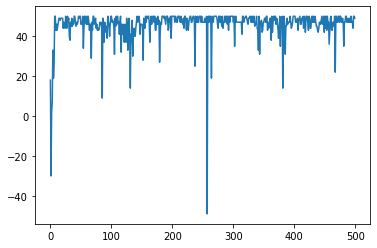

In [33]:
import matplotlib.pyplot as plt
plt.plot(l)
plt.savefig("./50pasos.png")
plt.show()


Al observar la gráfica se puede observar como al paso del tiempo los valores convergen al número de pasos asignados incialmente, esto indica que para cada paso en las iteraciones de los episodios el aprendizajese lleva a cabo, y es al final de las iteraciones donde se consiguen los kejores valores de rendimiento para el algoritmo. Como se puede observar se empieza desde los valores negativos y conforme avanza en los episodios los mínimos disminuyen convergiendo en los número positivos cercanos al número máximo de pasos por episodio. Cuando se le permite al agente explorar 10 pasos por episodio los resultados son más caoticos debido que se necesita más esfuerzo para que el agente aprenda el comportamiento adecuado lo cual oscila entre los errores y es suceptible a los sesgos.

Para comparar a continuación se muestra la gráfica resultante para 10 pasos por episodio.

![pasos](pasos.png)